<a href="https://colab.research.google.com/github/ich-20211101/domo/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64
2.
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64
3.
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.

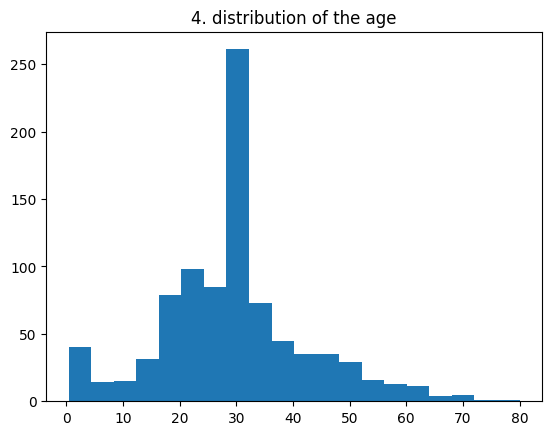

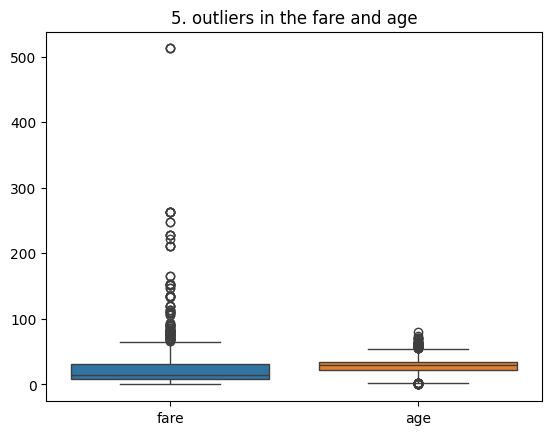

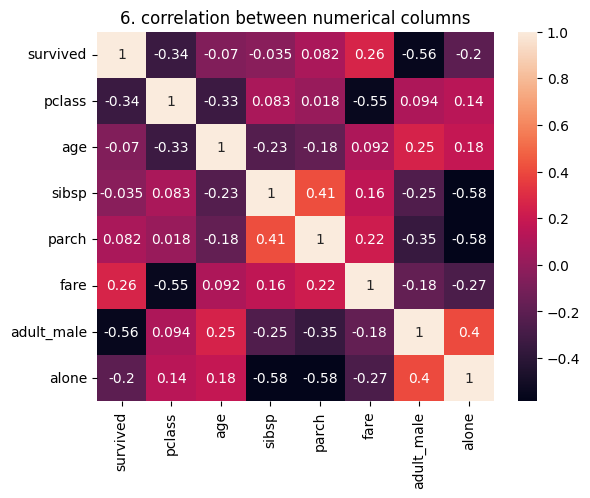

7.
 pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


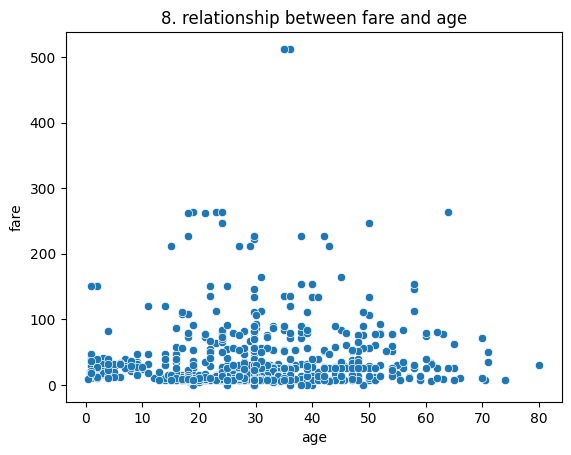

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

# Calculate the percentage of missing values in each column
missing_percentage = (titanic.isnull().sum() / len(titanic)) * 100

print("1.\n", missing_percentage)

# Handle missing values if any are present by either filling or dropping them
titanic.drop(columns=['deck'], inplace=True)
numeric_cols = titanic.select_dtypes(include=['number']).columns
titanic[numeric_cols] = titanic[numeric_cols].apply(lambda x: x.fillna(x.mean()))

print("2.\n", titanic.isnull().sum())

# Generate summary statistics for both numerical and categorical columns
numerical_summary = titanic.describe()
categorical_summary = titanic.describe(include=['O'])

print("3.\n", numerical_summary)
print(categorical_summary)

# Plot a histogram to observe the distribution of the age column
plt.hist(titanic["age"].dropna(), bins=20)
plt.title("4. distribution of the age")
plt.show()

# Use a boxplot to identify outliers in the fare and age columns
sns.boxplot(data=titanic[["fare", "age"]])
plt.title("5. outliers in the fare and age")
plt.show()

# Calculate and visualize the correlation between numerical columns using a heatmap
sns.heatmap(titanic.corr(numeric_only=True), annot=True)
plt.title("6. correlation between numerical columns")
plt.show()

# Find the average fare for each class and compare across categories
avg_fare_per_class = titanic.groupby("pclass")["fare"].mean()
print("7.\n", avg_fare_per_class)

# Create a scatter plot to visualize the relationship between fare and age
sns.scatterplot(x=titanic["age"], y=titanic["fare"])
plt.title("8. relationship between fare and age")
plt.show()